# TS Forecasting with CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Conv1D,MaxPooling1D,Flatten,Dropout

Using TensorFlow backend.


In [2]:
data = pd.read_csv('zuerich-monthly-sunspot-numbers.csv')

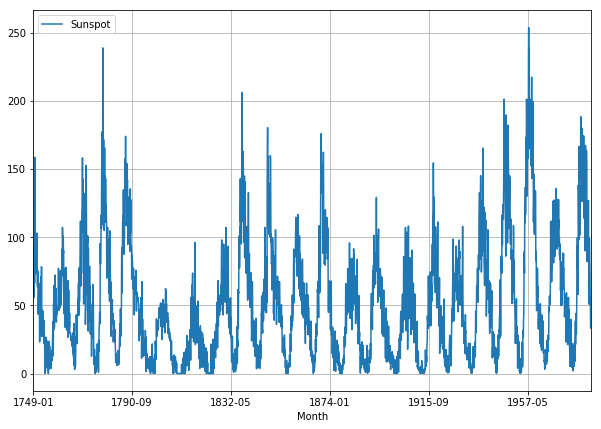

In [3]:
data.plot(x='Month', y='Sunspot', figsize=(10, 7))
plt.grid(True)

In [4]:
data = data.dropna()

In [5]:
def to_normalize(data):
    mini = min(data)
    maxi = max(data)
    return (data - mini) / (maxi - mini)

In [6]:
data = to_normalize(data['Sunspot'])
data = data + 1

In [7]:
lag = 10
#series = data['Sunspot']
#series = np.array(series)

In [8]:
X = []
y = []
for i in range(len(data)-lag):
    xi = []
    for j in range(i,i+lag):
        xi.append(data[j])
    X.append(xi)
    y.append(data[i+lag])

In [9]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(y)*train_size)]
    y_test = y[int(len(y)*train_size):]
    return x_train, x_test, y_train, y_test

In [10]:
X = np.reshape(X,(len(X), len(X[1]), 1))
X_train, X_test, y_train, y_test = split_data(X,y,train_size=0.3)

In [11]:
model = Sequential()
model.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(lag, 1)))
model.add(Conv1D(filters=10, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mse')

In [13]:
model.fit(X, y, epochs=100,verbose=0)

In [14]:
pred = model.predict(X_test)

In [15]:
def MAPE(y_test, predict):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - predict[i])/y_test[i])*100
    media_erro = soma/len(y_test)
    return media_erro

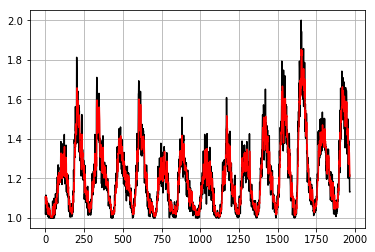

In [16]:
plt.plot(y_test,'k')
plt.plot(pred,'r')
plt.grid(True)

In [17]:
MAPE(y_test, pred)

array([3.7753956], dtype=float32)